In [196]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# sns.set()
sns.set(style='whitegrid', font_scale=1.6, font='Georgia', context='paper')

In [197]:
models_home_path = "/local1/Alisa-Ansh-Skyler/cartography/output"
random_path = os.path.join(models_home_path, "mnli_random")
ambi_path = os.path.join(models_home_path, "mnli_ambiguous")
mixed_path = os.path.join(models_home_path, "mnli_mixed")

In [198]:
# def delete_model(rel_path):
#     abs_path = os.path.join(models_home, rel_path)
#     abs_path = os.path.join(abs_path, 'pytorch_model.bin')
#     if os.path.exists(abs_path):
#         os.chmod(abs_path, 0o777)
#         os.remove(abs_path)
#     else:
#         print('file not found')

In [199]:
def get_accs(model_path):
    diag_path = os.path.join(model_path, "eval_metrics_diagnostics.json")
    dev_matched_path = os.path.join(model_path, "eval_metrics_mnli_dev_matched_in_training.json")
    dev_mismatched_path = os.path.join(model_path, "eval_metrics_mnli-mm_dev_mismatched_in_training.json")
    with open(diag_path) as f:
        diag_acc = float(f.read().split('\n')[-2].split()[3])
    with open(dev_matched_path) as f:
        data = json.loads(f.read().split('\n')[-2])
        matched_acc = data['acc']
    with open(dev_mismatched_path) as f:
        data = json.loads(f.read().split('\n')[-2])
        mismatched_acc = data['acc']
    return {'diag_acc':diag_acc, 'matched_acc':matched_acc, 'mismatched_acc':mismatched_acc}

In [200]:
fracs = ['0.01', '0.05', '0.10', '0.17', '0.25', '0.33', '0.50', '0.75']
random_dev_matched_acc = []
ambi_dev_matched_acc = []
random_dev_mismatched_acc = []
ambi_dev_mismatched_acc = []
random_dev_diagnostics_acc = []
ambi_dev_diagnostics_acc = []

for frac in fracs:
    random_model_path = os.path.join(random_path, 'random_'+frac)
    ambi_model_path = os.path.join(ambi_path, 'ambiguous_'+frac)
    random_acc = get_accs(random_model_path)
    ambi_acc = get_accs(ambi_model_path)
    
    random_dev_matched_acc.append(random_acc['matched_acc'])
    ambi_dev_matched_acc.append(ambi_acc['matched_acc'])
    random_dev_mismatched_acc.append(random_acc['mismatched_acc'])
    ambi_dev_mismatched_acc.append(ambi_acc['mismatched_acc'])
    random_dev_diagnostics_acc.append(random_acc['diag_acc'])
    ambi_dev_diagnostics_acc.append(ambi_acc['diag_acc'])


Text(0, 0.5, 'acc (matched ID)')

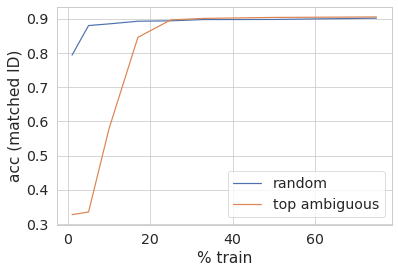

In [205]:
perc = [float(frac)*100 for frac in fracs]
k = len(perc)
ax = plt.gca()
ax.plot(perc[:k], random_dev_matched_acc[:k], label='random')
ax.plot(perc[:k], ambi_dev_matched_acc[:k], label='top ambiguous')
ax.legend()

plt.xlabel('% train')
plt.ylabel('acc (matched ID)')

Text(0, 0.5, 'acc (mismatched ID)')

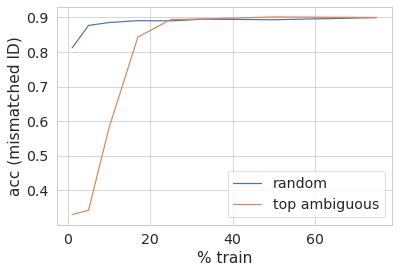

In [206]:
perc = [float(frac)*100 for frac in fracs]
k = len(perc)
ax = plt.gca()
ax.plot(perc[:k], random_dev_mismatched_acc[:k], label='random')
ax.plot(perc[:k], ambi_dev_mismatched_acc[:k], label='top ambiguous')
ax.legend()

plt.xlabel('% train')
plt.ylabel('acc (mismatched ID)')

Text(0, 0.5, 'acc (OOD)')

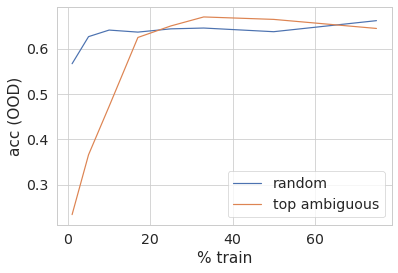

In [203]:
perc = [float(frac)*100 for frac in fracs]
k = len(perc)
ax = plt.gca()
ax.plot(perc[:k], random_dev_diagnostics_acc[:k], label='random')
ax.plot(perc[:k], ambi_dev_diagnostics_acc[:k], label='top ambiguous')
ax.legend()

plt.xlabel('% train')
plt.ylabel('acc (OOD)')

In [192]:
fracs = ['0.10', '0.20', '0.25', '0.33', '0.50', '0.66', '0.75', '0.90']
random_ood = random_dev_diagnostics_acc[1]
random_matched = random_dev_matched_acc[1]


ambi_ood = ambi_dev_diagnostics_acc[1]
ambi_matched = ambi_dev_matched_acc[1]

mixed_ood_acc = []
mixed_matched_acc = []

for frac in fracs:
    mixed_model_path = os.path.join(mixed_path, "mixed_"+frac)
    accs = get_accs(mixed_model_path)
    mixed_ood_acc.append(accs['diag_acc'])
    mixed_matched_acc.append(accs['matched_acc'])

Text(0, 0.5, 'acc (matched ID)')

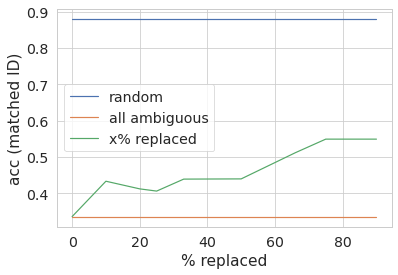

In [193]:
perc = [0] + [float(frac)*100 for frac in fracs]
k = len(perc)
ax = plt.gca()
ax.plot(perc[:k], [random_matched for i in range(k)], label='random')
ax.plot(perc[:k], [ambi_matched for i in range(k)], label='all ambiguous')
ax.plot(perc[:k], [ambi_dev_matched_acc[1]] + mixed_matched_acc, label='x% replaced')
ax.legend()

plt.xlabel('% replaced')
plt.ylabel('acc (matched ID)')


# perc = [0] + [float(frac)*100 for frac in fracs]
# k = len(perc)
# ax = plt.gca()
# ax.plot(perc[:k], [random_matched for i in range(k)], label='random')
# ax.plot(perc[:k], [ambi_matched for i in range(k)], label='all ambiguous')
# ax.plot(perc[:k], [ambi_dev_matched_acc[1]] + mixed_matched_acc, label='top ambiguous with replacements')
# ax.legend()

# plt.xlabel('% replaced')
# plt.ylabel('acc (matched ID)')

Text(0, 0.5, 'acc (OOD)')

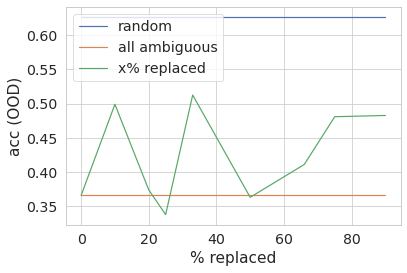

In [194]:
perc = [0] + [float(frac)*100 for frac in fracs]
k = len(perc)
ax = plt.gca()
ax.plot(perc[:k], [random_ood for i in range(k)], label='random')
ax.plot(perc[:k], [ambi_ood for i in range(k)], label='all ambiguous')
ax.plot(perc[:k], [ambi_dev_diagnostics_acc[1]] + mixed_ood_acc, label='x% replaced')
ax.legend(loc='upper left')

plt.xlabel('% replaced')
plt.ylabel('acc (OOD)')
